# Vsini tutorial

In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import hpfspec
import numpy as np
from hpfspec import utils, spec_help
utils
#sys.path.pop(0)

<module 'hpfspec.hpfspec.utils' from '/Users/gks/Dropbox/mypylib/notebooks/GIT/hpfspec/hpfspec/utils.py'>

In [2]:
# Read in three target star spectra
H1 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits",ccf_redshift=True)
H2 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits",ccf_redshift=True)
H3 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/G_227-22/Slope-20180919T015627_R01.optimal.fits",ccf_redshift=True)

Text(0, 0.5, 'Normalized Flux')

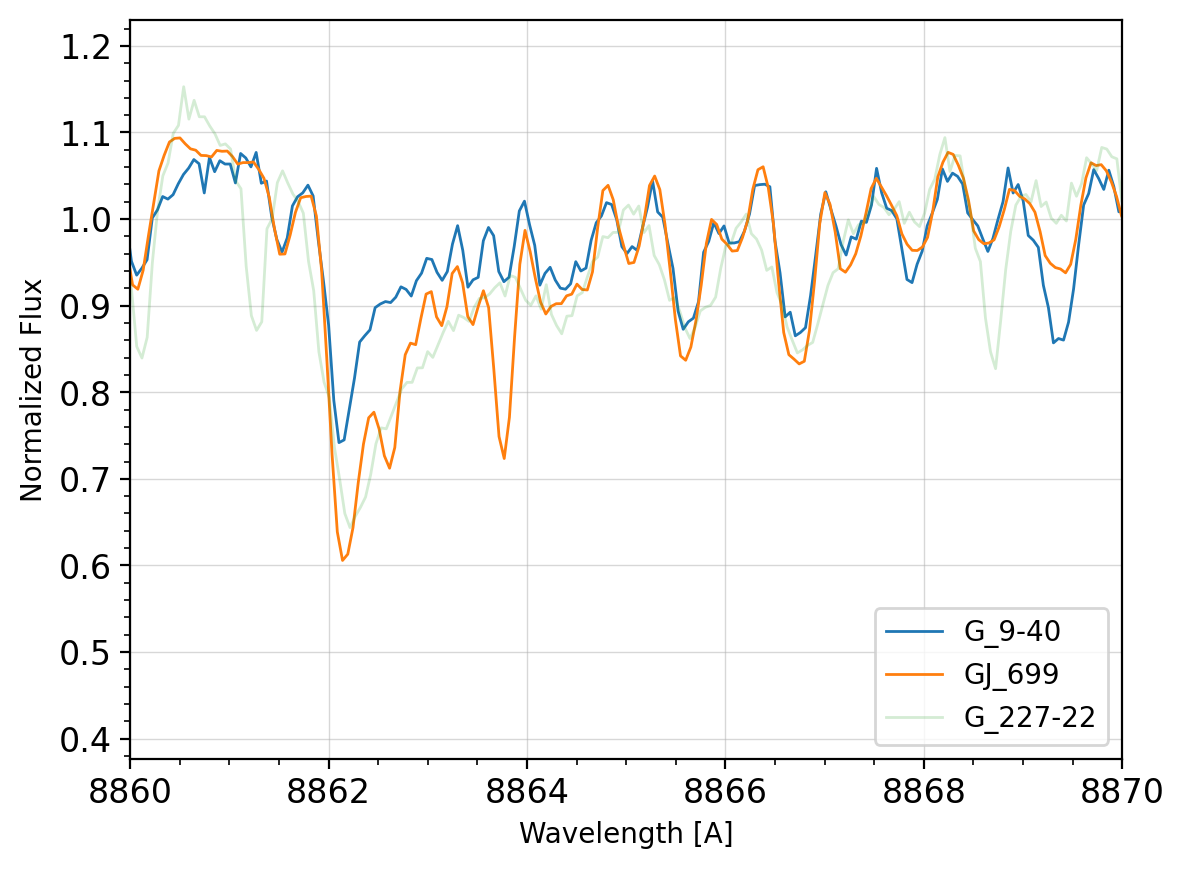

In [3]:
# Lets overplot both of them and see that they line up
# Lets take a look at the TiO bandhead at ~8860A
# G 227-22 is definitely broader
# G 9-40 is shallower in the TiO band (earlier spectral type)
fig, ax = plt.subplots(dpi=200)
o = 6
ax.plot(H1.w_shifted[o],H1.f_debl[o],lw=1,label=H1.object)
ax.plot(H2.w_shifted[o],H2.f_debl[o],lw=1,label=H2.object)
ax.plot(H3.w_shifted[o],H3.f_debl[o],lw=1,alpha=0.2,label=H3.object)
utils.ax_apply_settings(ax)
ax.legend(loc='lower right')
ax.set_xlim(8860,8870)
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Normalized Flux')

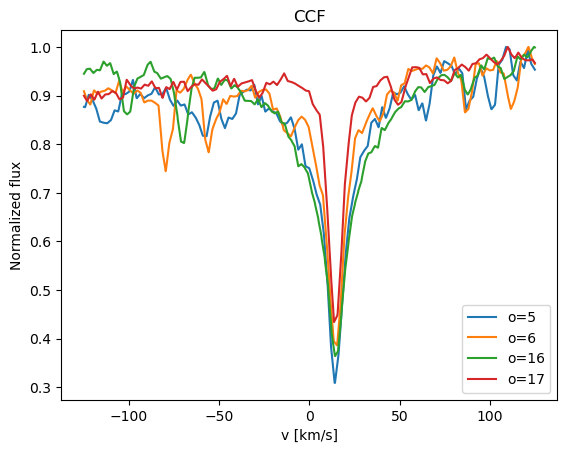

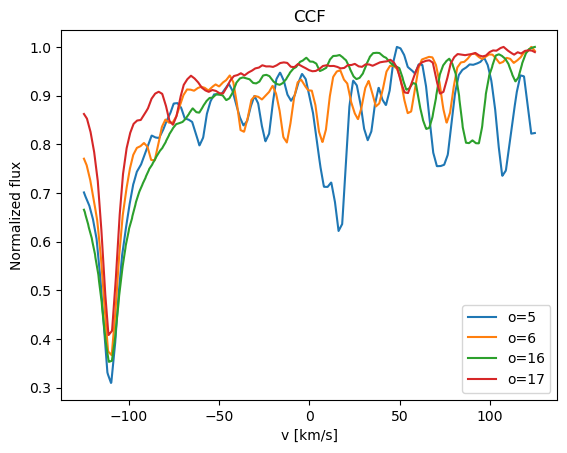

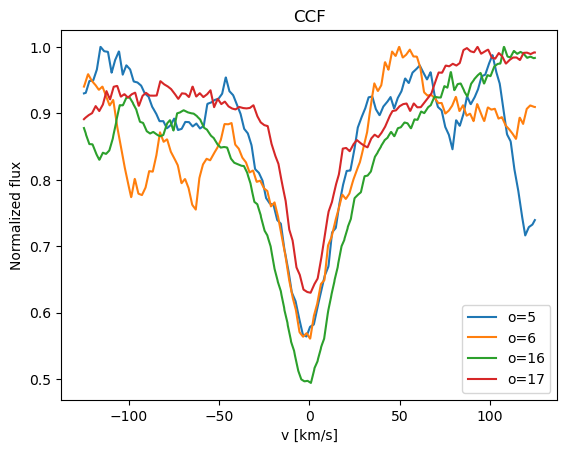

In [6]:
# Lets take a look at CCFs
v = np.linspace(-125.,125.,1501)
orders = [5,6,16,17]
CCF1 = H1.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF2 = H2.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF3 = H3.calculate_ccf_for_orders(v,orders=orders,plot=True)

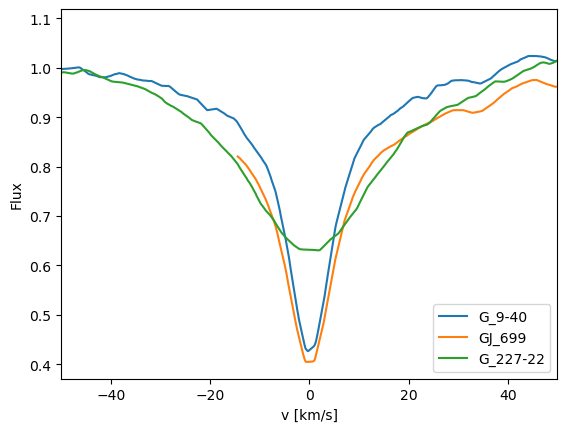

In [7]:
# Lets line all of them up
fig, ax = plt.subplots(dpi=100)
ax.plot(v-H1.rv,CCF1[28]/np.median(CCF1[28]),label=H1.object)
ax.plot(v-H2.rv,CCF2[28]/np.median(CCF2[28]),label=H2.object)
ax.plot(v-H3.rv,CCF3[28]/np.median(CCF3[28]),label=H3.object)
ax.set_xlim(-50,50)
ax.set_xlabel('v [km/s]')
ax.set_ylabel('Flux')
ax.legend(loc='lower right')

# Calculating Vsinis by comparing CCF widths 

In [8]:
# Lets calculate CCFs by comparing CCF widths.
# Note this assumes that your reference star and target star are similar spectral types.
# This further assumes that the reference star is a slow (0-2km/s) rotator, such that the vsini broadening is not 
# seen with the HPF resolution

2.472570064180306 8.9927915495443 [2.56372819]
o=4, vsini= 2.553737609280703km/s
2.8723542421038832 13.42270240474937 [2.71376685]
A value in x_new is below the interpolation range.
Setting v1=0
o=5, vsini= 0.0km/s
2.839959564682947 10.218159955164333 [2.81334353]
A value in x_new is below the interpolation range.
Setting v1=0
o=6, vsini= 0.0km/s
3.0179460049728966 10.448815395227422 [2.92500978]
A value in x_new is below the interpolation range.
Setting v1=0
o=14, vsini= 0.0km/s
3.097370198012541 11.401930870229856 [2.92127553]
A value in x_new is below the interpolation range.
Setting v1=0
o=15, vsini= 0.0km/s
2.988860393662652 9.609356644320416 [2.93821162]
A value in x_new is below the interpolation range.
Setting v1=0
o=16, vsini= 0.0km/s
3.0429597357317495 11.534683663244182 [3.04158917]
A value in x_new is below the interpolation range.
Setting v1=0
o=17, vsini= 0.0km/s
out_vsini/ already exists.
Saved to out_vsini/G_9-40_vsini.png


(0.0, 0.8936220113846742)

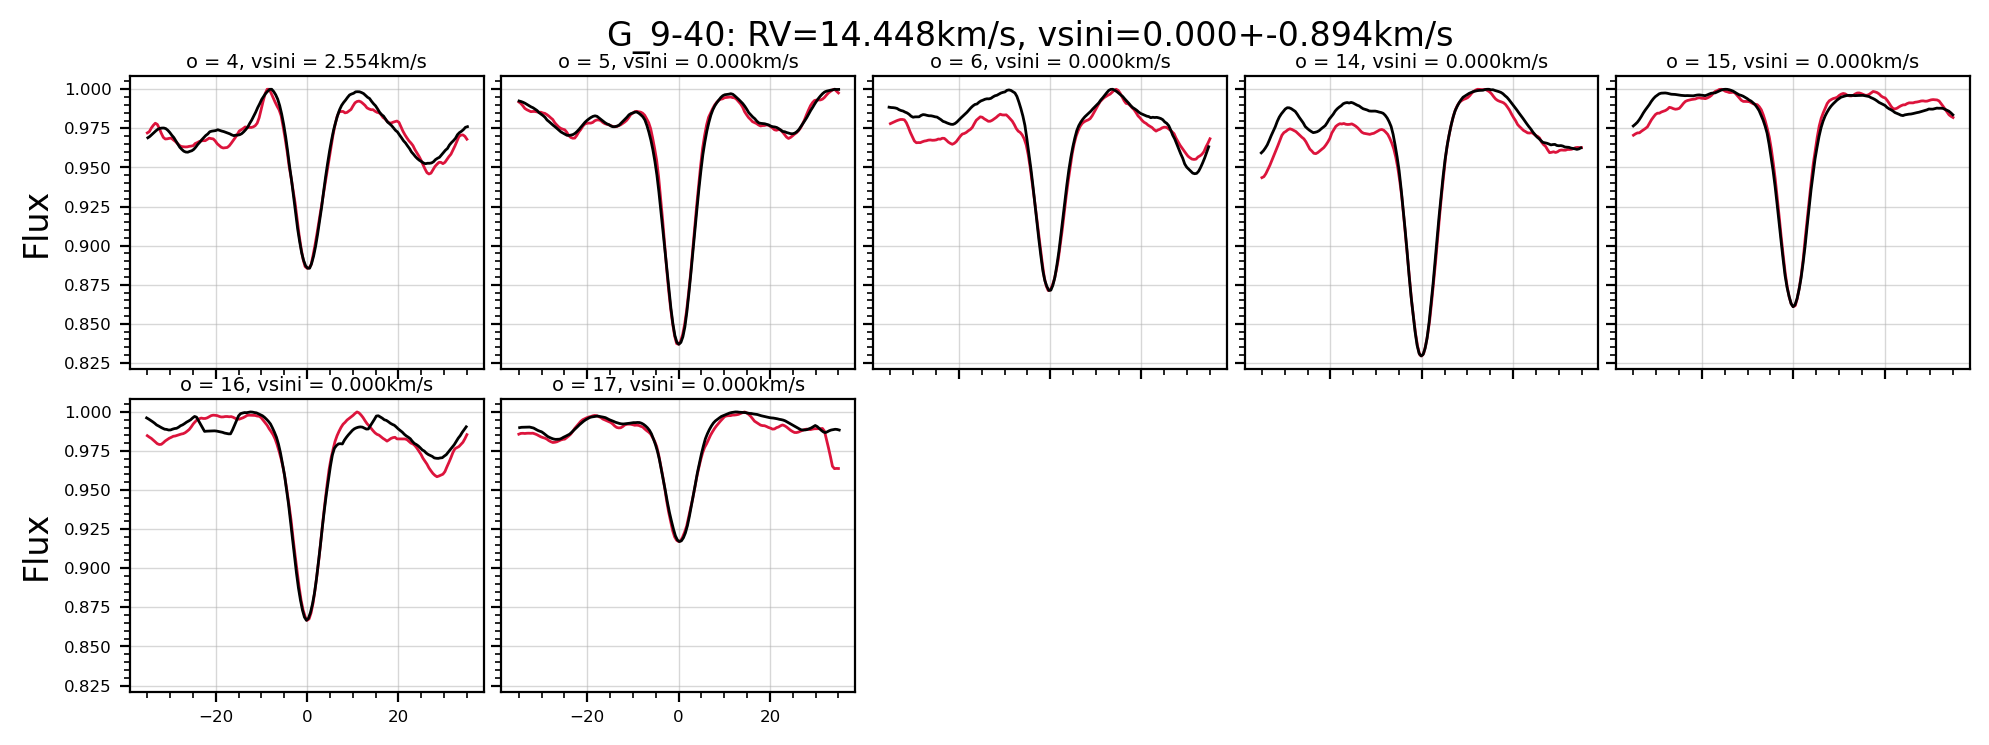

In [9]:
# Slow rotator G 9-40
ftarg = "../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits"
fcal = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True)

2.472570064180306 8.9927915495443 [5.7373838]
o=4, vsini= 15.043445938688938km/s
2.8723542421038832 13.42270240474937 [8.38707344]
o=5, vsini= 15.88469300504281km/s
3.0179460049728966 10.448815395227422 [6.98882909]
o=14, vsini= 14.864091712571884km/s
3.097370198012541 11.401930870229856 [7.65488388]
o=15, vsini= 15.129518993594433km/s
2.988860393662652 9.609356644320416 [7.67627461]
o=16, vsini= 15.866689893014886km/s
3.0429597357317495 11.534683663244182 [8.1661497]
o=17, vsini= 16.191000284791723km/s
out_vsini/ already exists.
Saved to out_vsini/G_227-22_vsini.png


(15.498104443304658, 0.5016536426210112)

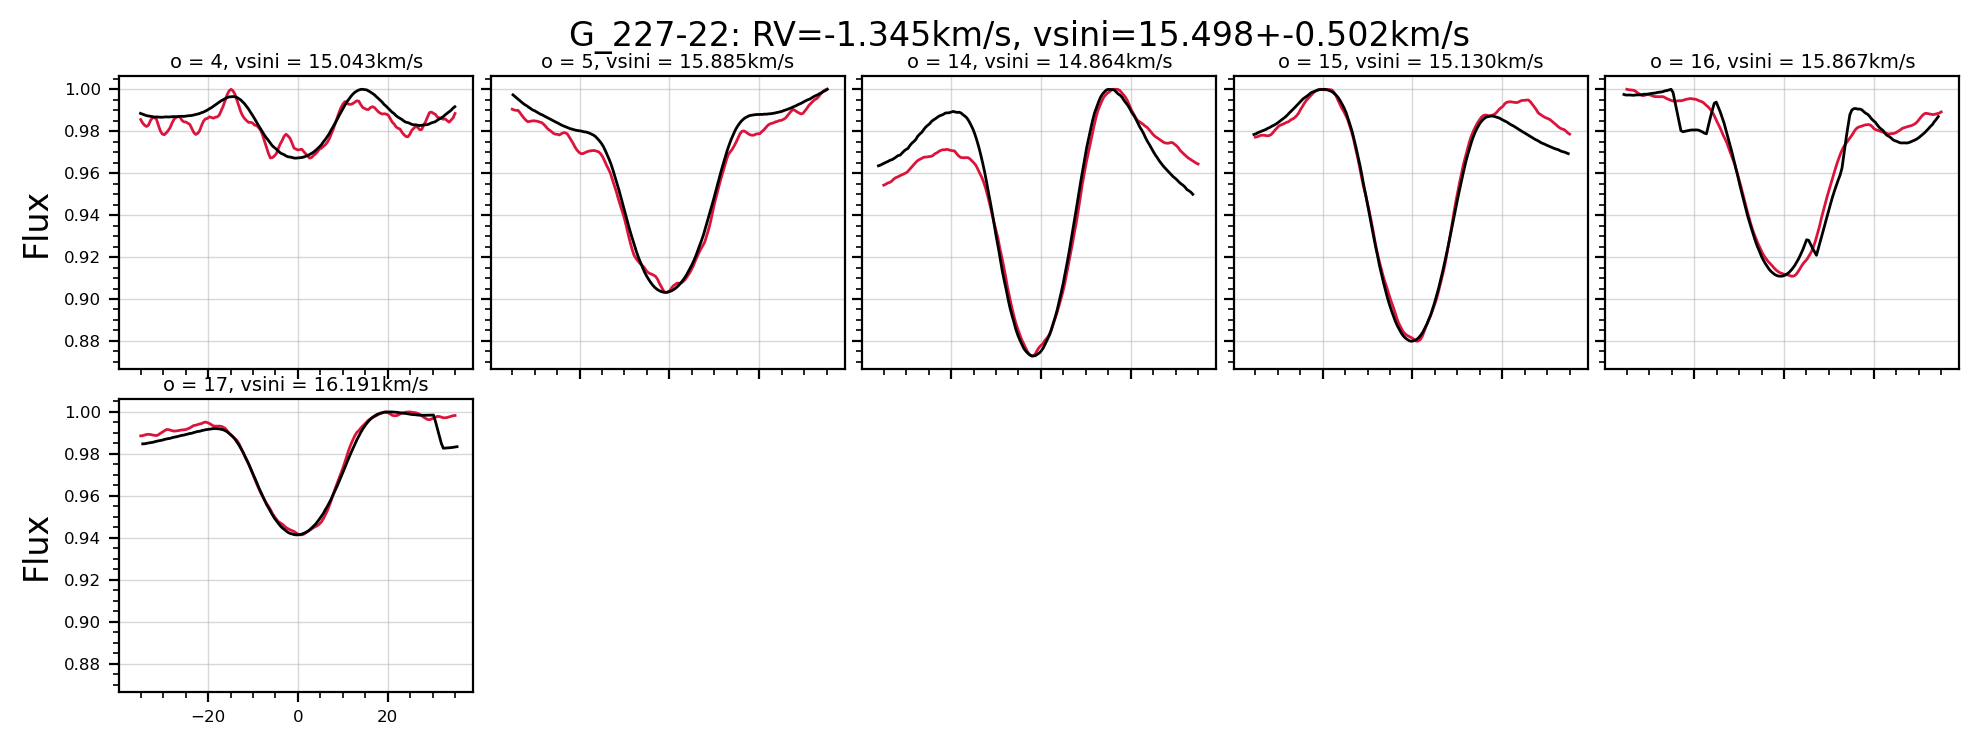

In [10]:
# Fast rotator: G 227-22
ftarg = "../hpfspec/data/hpf/spectra/G_227-22/Slope-20180919T015627_R01.optimal.fits"
fcal  = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True,orders=[4, 5, 14, 15, 16, 17])